In [2]:
from pathlib import Path
import plotly.express as px
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_image(path,bbox):
    return np.array(Image.open("../output" / path))[bbox[0]:bbox[1],bbox[2]:bbox[3]]

methods = [
    ("/test/normal_alpha_30000/renders/","3DGS 500k"),
    ("/test/normal_alpha_7000/renders/","3DGS 50k"),
    ("/test/texture_alpha_7000/renders/","Textured 50k"),
    ("_depth/test/texture_alpha_30000/renders/","Textured+Depth 50k"),
]

scenes = {
    "chair_background2_slow": [
        ("00014",(0,800,0,800)),
        ("00014",(475,575,275,375))
    ],
    "mic_slow": [
        ("00006",(0,800,0,800)),
        ("00006",(150,250,600,700))
    ],
    "ship_slow": [
        ("00003",(0,800,0,800)),
        ("00003",(275,425,200,350))
    ],
    "livingroom_slow": [
        ("00000",(0,480,0,480)),
        ("00000",(50,150,225,325)),
        ("00000",(300,350,275,325))
    ]
}

out_images = []
for scene_name, image_names in scenes.items():
    for image_name, bbox in image_names:
        image_row = []
        image_row.append(read_image(Path(scene_name+methods[0][0]) / f"{image_name}_gt.png", bbox))

        for path,name in methods:
            
            if "texture" in path:
                path = Path(scene_name+path) / f"{image_name}_texture.png"
            else:
                path = Path(scene_name+path) / f"{image_name}.png"
            image_row.append(read_image(path,bbox))
        out_images.append(image_row)

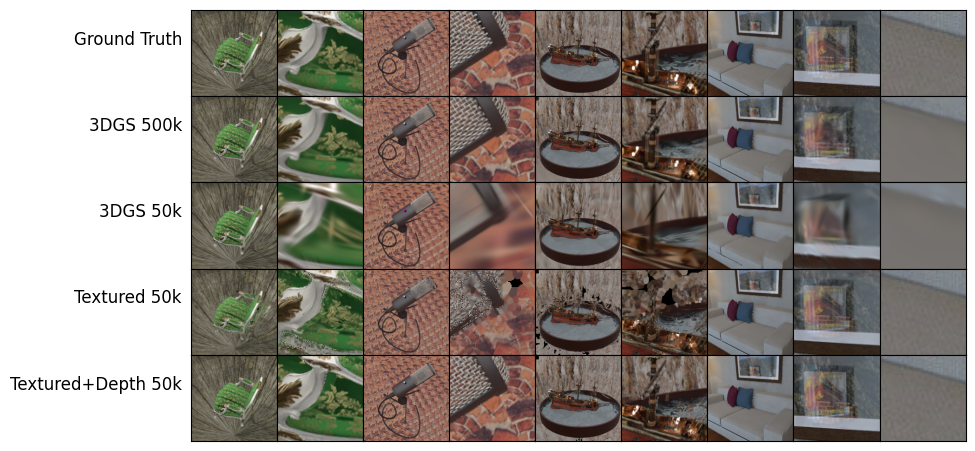

In [6]:
fig, axs = plt.subplots(len(out_images[0]), len(out_images), figsize=(10, 5.6))

for i,row in enumerate(out_images):
    for j,image in enumerate(row):
        axs[j,i].imshow(image)

for j in range(len(out_images[0])):
    if j>0:
        axs[j,0].set_title(methods[j-1][1],loc="right", x=-0.1, y=0.5)
    else:
        axs[j,0].set_title("Ground Truth",loc="right", x=-0.1, y=0.5)
        
# Remove tick marks and axis labels
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("../figures/qual1.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()


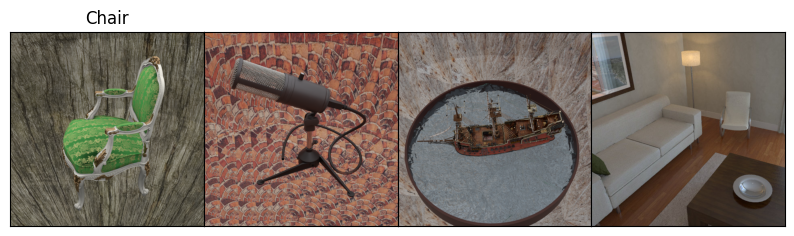

In [18]:
fig, axs = plt.subplots(1,4, figsize=(10, 5.6))

axs[0].imshow(np.array(Image.open("../output/chair_background2_slow/train/normal_alpha_2000/renders/00005_gt.png")))
axs[1].imshow(np.array(Image.open("../output/mic_slow/train/normal_alpha_2000/renders/00005_gt.png")))
axs[2].imshow(np.array(Image.open("../output/ship_slow/train/normal_alpha_2000/renders/00001_gt.png")))
axs[3].imshow(np.array(Image.open("../output/livingroom_slow/train/normal_alpha_2000/renders/00016_gt.png"))[:,:480])
axs[0].set_title("Chair")
axs[0].set_title("Microphone")
axs[0].set_title("Ship")
axs[0].set_title("Livingroom")

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig("../figures/scenes.pdf", dpi=800,bbox_inches="tight", pad_inches=0)
# Show the figure
plt.show()